# Tools for Data Science - Final Project
# Title: Exploring the Market of Laptops through Pricing and Performance Testing

## My Data

*First Name: Isaac*

*Last Name: Sluder*

*E-mail: iws4@uakron.edu*

*UID: 4632256*


## Background and Motivation
Discuss your motivations and reasons for choosing this project, especially any background or research interests that may have influenced your decision.

Laptops have always been a huge interest to me personally. I have a lot of friends who are desktop people. I am not, I prefer portability over performance. I stumbled upon this dataset when viewing open datasets published on [Kaggle](https://www.kaggle.com/)–which is a data science website. Immediately I was attracted to the prospects of learning and gaining insight on the pricing and the performace of laptops. 

## Project Objectives
Provide the primary questions you are trying to answer in your project. What would you like to learn and accomplish? List the benefits.

The primary questions I am trying to answer are:
1. What are the major catagories that influence the pricing of laptops?
2. How is pricing related to components?
3. How is rating related to pricing?
4. Is there a correlation between performance and pricing, and how do we get performace metrics?

## Data
From where and how are you collecting your data? If appropriate, provide a link to your data sources.

The primary data is coming from [Laptop Dataset (2024)](https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023/data),
the secondary source is still developing. To avoid collecting performance data by hand, there is a need to come up with a webscraping api to gather information from a computer performance website.
The computer performance website to be scraped is [Geekbench](https://www.geekbench.com/).
The reasoning behind this, is is one of the most popular performance benching websites that includes metrics that can be compared accross different computer operating systems. Which is one hurdle of the dataset.

Current plan to scrap the web is to use [yafethtb](https://github.com/yafethtb/Geekbench-Web-Scraping-Project) web parsing functions. I've already started to demo the functions in the `GeekBench_parsing.py` file. Though parsing Geekbench may take some time.

Below is a start to the importing of the data set containing the laptops.

### Imports

In [1]:
# ! pip install forex-python    #Run this line if forex-python is not installed

In [2]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
sns.set_theme()
from forex_python.converter import CurrencyRates

import statsmodels.formula.api as sm

#%matplotlib notebookm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

Read in both Dataframes. `laptops.csv` was obtained from kaggle. `geekbench_data.csv` was parsed from the internet. 

In [3]:
df = pd.read_csv('laptops.csv')
print(df.head(5))

   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... secondary_storage_type  secondary_storage_c

Info about the Dataframe.

In [4]:
print(set(df['brand']))
print(df.groupby('OS')['OS'].count())
print(f"Ratings min: {df['Rating'].min()}, max: {df['Rating'].max()}")
print(set(df['processor_tier']))

{'apple', 'wings', 'asus', 'msi', 'microsoft', 'realme', 'chuwi', 'axl', 'honor', 'lenovo', 'avita', 'zebronics', 'acer', 'ultimus', 'lg', 'tecno', 'iball', 'infinix', 'hp', 'dell', 'fujitsu', 'gigabyte', 'samsung', 'walker', 'primebook', 'jio'}
OS
android      1
chrome      16
dos         32
mac         15
other        2
ubuntu       1
windows    924
Name: OS, dtype: int64
Ratings min: 24, max: 89
{'core ultra 7', 'ryzen 5', 'core i5', 'core i9', 'ryzen 9', 'm1', 'm3', 'ryzen 7', 'core i7', 'core i3', 'ryzen 3', 'celeron', 'pentium', 'm2', 'other'}


In [5]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


Note: the price is in rupees, will have to convert, using forex_python.converter to get the current rate.

## Ethical considerations
Complete a stakeholder analysis for your project.

The topic of this project has most to do with Laptops, which in my opinion seems to be a lighter topic or less examined one in the world of ethics. But I would have to imagine that if the results were published, it is possible that they may sway opinions of those purchasing laptops. And one must consider if this is wrong or right. I would argue it is our best interest to be examining the relationship between cost and performace and see how much is influenced by the "Name" of the company. Learning what the best bang for your buck could be helpful at the very least. This topic could be further explored in Ethics and Data Science.



## Data Processing
Do you expect to do substantial data cleanup or data extraction? What quantities do you plan to derive from your data? How will data processing be implemented?

From early examination, it does not seem like a ton of data cleanup for the Laptop dataset will be need. The cleanup is going to come in when extracting data from the website for the performance dataset. Some intial thoughts on the data cleansing would be to tranfer the price from Rupees to USD. We can do that with the forex-python library. 

In [6]:
c = CurrencyRates()
rate = c.get_rate('INR', 'USD')
# rate = 0.012          #If for some reason, CurrencyRates() does not work, comment the above lines, and initiate this rate.
df['Price'] = df['Price'] * rate
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,930.847794,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,691.329541,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,118.062910,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,525.199241,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,745.723891,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1075.155552,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5475.348165,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


For the geekbench scraped data, some sample data has been collected. First a quarry was needed to be made. This is done in the next cell. The geekbench data provides benchmarked scores for the cpu performance of all kinds of computers. Our aim is for us to obtain results of laptop performance so a quarry must be made to obtain those results. 

In [7]:
full_quarry = []
for model in df['Model']:
        details = model.split(" ")
        brand = details[0]
        count = 0
        for det in details:
        
            if det.startswith("("):
                st_placement = count
            if det.endswith("/"):
                et_placement = count
                break
            if det == 'Laptop':
                Lp_placement = count
            count += 1

        #Apple requires some special attention. Though it is possible apple may be discarded later becuase the data set size for apple is only 15 laptops.
        if brand == 'Apple':
            quarry = []
            quarry.append(brand)
            for det in details[1:Lp_placement]:
                if det == 'MGND3HN':
                    pass
                else:
                    quarry.append(det)
            for det in details[st_placement:et_placement+1]:
                quarry.append(det.strip("()/"))
            name = ""
            for det in quarry:
                name += str(det) + " "
            
            full_quarry.append(name)
        else:
            quarry = []
            quarry.append(brand)
            for det in details[st_placement:et_placement+1]:
                quarry.append(det.strip("()/"))
            
            name =""
            for det in quarry:
                name += str(det) + " "
            
            full_quarry.append(name)
        
        
for name in full_quarry:

    print(name)

Tecno 11th Gen Core i3 
Tecno 11th Gen Core i7 
HP AMD Ryzen 5 5600H 
Acer 12th Gen Core i5 
Lenovo AMD Ryzen 3 5300U 
Apple MacBook Air 2020 Apple M1 
Infinix 11th Gen Core i5 
Asus 11th Gen Core i5 
HP 12th Gen Core i3 
Infinix 13th Gen Core i9 
Dell 12th Gen Core i3 
Samsung 12th Gen Core i5 
MSI 12th Gen Core i5 
Asus Ryzen 7-5800H 
Lenovo 11th Gen Core i5 
HP 14th Gen Core i7 
Lenovo 12th Gen Core i7 
Asus 11th Gen Core i7 
HP AMD Ryzen 5 7535HS 
Wings 11th Gen Core i5 
HP AMD Athlon Silver-3050U 
Lenovo AMD Ryzen 3 7320U 
Apple MacBook Pro 16 2023 Apple M3 Max 
Asus 12th Gen Core i3 
Asus 11th Gen Core i3 
Acer 13th Gen Core i5 
HP AMD Ryzen 7 7840HS 
Ultimus 10th Gen Core i5  
HP 13th Gen Core i5 
MSI 11th Gen Core i7 
Samsung 12th Gen Core i5 
Samsung 12th Gen Core i5 
Lenovo 11th Gen Core i5 
Asus Ryzen 5-5600H 
Apple MacBook Air 2022 Apple M2 
Dell 12th Gen Core i5 
Acer 12th Gen Core i5 
Acer 12th Gen Core i3 
HP 12th Gen Core i5 
Asus 12th Gen Core i5 
Asus AMD Ryzen 9 6900

This is what the web addresses were then constructed with. The challenge with automating the quarry is that to obtain a generalizability of the data set, simplifying the quarry was necessary but also keeping enough detail to differentiate the scores. 

In [8]:
print(len(full_quarry))
print(len(set(full_quarry)))

991
274


Our quarry generalizes the search for 274 CPUs. After developing the quarry a few columns were added to help track which quarry was associated with which cpu/laptop. We will import that here overtop df since it replaces that dataset.

In [9]:
df = pd.read_csv('laptops_quarry.csv', index_col=0)
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,quarry,urls_quarry,num_pages
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,integrated,False,15.6,1920,1080,windows,1,Tecno 11th Gen Core i3,https://browser.geekbench.com/search?q=Tecno+1...,0
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,integrated,False,15.6,1920,1080,windows,1,Tecno 11th Gen Core i7,https://browser.geekbench.com/search?q=Tecno+1...,0
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,dedicated,False,15.6,1920,1080,windows,1,HP AMD Ryzen 5 5600H,https://browser.geekbench.com/search?q=HP+AMD+...,112
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,integrated,False,14.0,1920,1080,windows,1,Acer 12th Gen Core i5,https://browser.geekbench.com/search?q=Acer+12...,4
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,integrated,False,15.6,1920,1080,windows,1,Lenovo AMD Ryzen 3 5300U,https://browser.geekbench.com/search?q=Lenovo+...,20


Note above the quarry has 3 new columns, quarry, urls_quarry, and num_pages. If num_pages = 0, then the quarry was a failure and we will have to disregard that CPU or find another way to fill in the gaps.

In [10]:
count = 0
for num in df['num_pages']:
    if num > 0:
        count +=1
        
print(f"This scraping method accounts for {count} of {len(df['num_pages'])} \nlaptops yielding {(count/len(df['num_pages']))*100:.3f}% scraping success. ")

This scraping method accounts for 792 of 991 
laptops yielding 79.919% scraping success. 


But as shown above, we retain most of the data. Next we can import the data that was quarried. Details of how this quarry was done, can be found in 'prototyping_parser.ipynb'. I plan to combine this into a single python script, I want to run a greater quarry later to see if that will effect the data we will recieve.

In [11]:
df_p = pd.read_csv('geekbench_data.csv', index_col=0)
df_p.head()

,CPU Name,Platform Name,Single-core Score,Multi-core Score,quarry
0,AMD Ryzen 7 7840HS 3801 MHz (8 cores),Windows,2116,10129,https://browser.geekbench.com/search?q=HP+AMD+...
1,AMD Ryzen 7 PRO 7840HS 3801 MHz (8 cores),Windows,2311,11656,https://browser.geekbench.com/search?q=HP+AMD+...
2,AMD Ryzen 7 7840HS 3801 MHz (8 cores),Windows,2576,12662,https://browser.geekbench.com/search?q=HP+AMD+...
3,AMD Ryzen 7 7840HS 3801 MHz (8 cores),Windows,2414,10761,https://browser.geekbench.com/search?q=HP+AMD+...
4,AMD Ryzen 7 7840HS 3801 MHz (8 cores),Windows,2524,12349,https://browser.geekbench.com/search?q=HP+AMD+...


In [12]:
df_p.describe()

,Single-core Score,Multi-core Score
count,28931.000000,28931.000000
mean,1816.219833,7527.202482
std,633.073422,4097.553640
min,94.000000,147.000000
25%,1385.500000,4640.000000
50%,1870.000000,6973.000000
75%,2273.500000,9754.000000
max,3283.000000,21725.000000


As you can see, the range is quite large, and the standard deviation is a large gap. Lets see how many duplicates there are:

([], [])

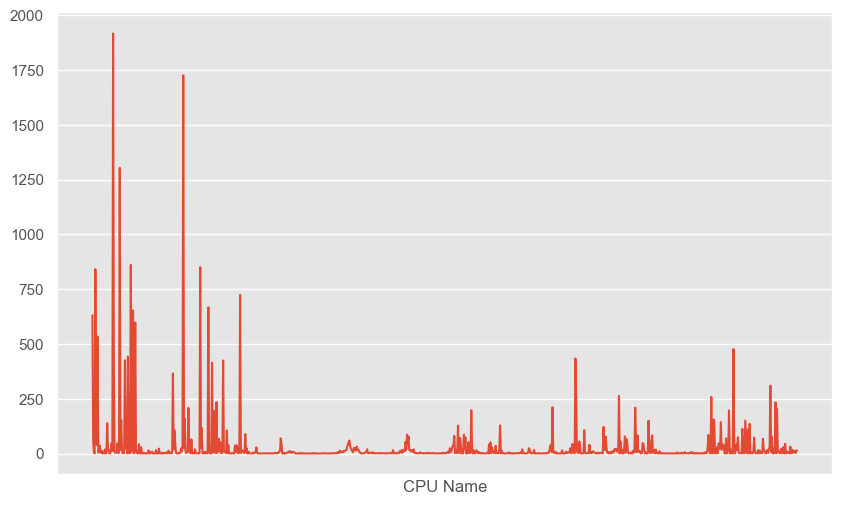

In [13]:
df_cpu_group = df_p.groupby('CPU Name')['Platform Name'].count()
df_cpu_group.plot()
plt.xticks([])

There are definitely a lot of duplicates. If the standard deviation of the dataset is ok, we can average all of them. Note there is no order to the above graph.

Text(0, 0.5, 'Standard Deviation')

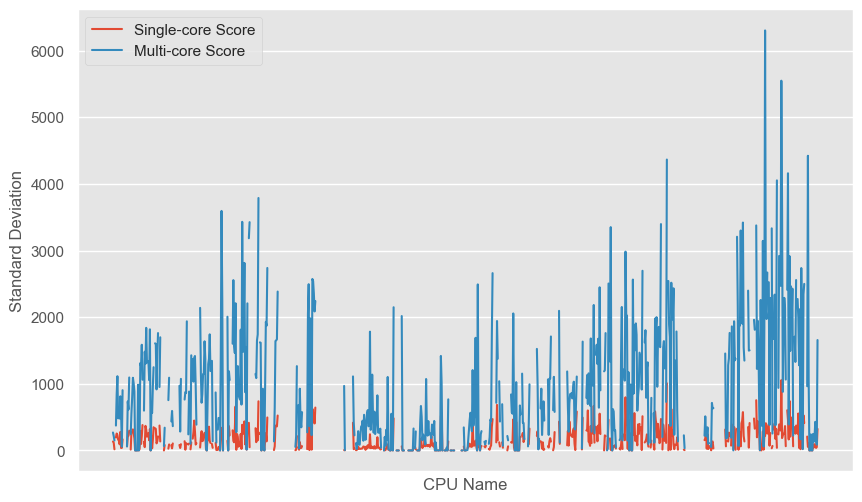

In [14]:
df_cpu_group = df_p.groupby('CPU Name')[['Single-core Score', 'Multi-core Score']].std()
df_cpu_group.plot()
plt.xticks([])
plt.ylabel('Standard Deviation')

From this point we can tell that the standard deviation tells us for multi-core score, there is a wide range of values. Which means our cpu quarry is too generalizable. If we can find a way to correlate the laptop dataset better to each cpu description that will be best. For now we will continue, but this will be something we come back to.

In [15]:
# Relate is used to "relate" the two dataframes into one.
relate = dict(df_p.groupby('quarry')[['Single-core Score', 'Multi-core Score']].mean())
relate['Single-core Score'].keys()

Index(['https://browser.geekbench.com/search?q=ASUS+AMD+Ryzen+9+7940HS++',
       'https://browser.geekbench.com/search?q=Acer++Intel+Celeron+N4500+',
       'https://browser.geekbench.com/search?q=Acer+11th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+11th+Gen+Core+i5++',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i3+',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i7+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i3+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i7+',
       ...
       'https://browser.geekbench.com/search?q=Lenovo+Ryzen+7+5800H+',
       'https://browser.geekbench.com/search?q=MSI+13th+Gen+Core+i7+',
       'https://browser.geekbench.com/search?q=MSI+AMD+Ryzen+7++',
       'https://browser.geekbench.com/search?q=Micro

Now that we have retrieved the Scores and placed them in a dictionary, we can easily use apply to create new columns with those scores.

In [16]:
count = 0
sc_array = []
for i in df['urls_quarry']:
    if i in set(relate['Single-core Score'].keys()):
        sc_array.append(relate['Single-core Score'][i])
        count += 1
    else:
        sc_array.append(np.NaN)
print(count)

count = 0
mc_array = []
for i in df['urls_quarry']:
    if i in set(relate['Multi-core Score'].keys()):
        mc_array.append(relate['Multi-core Score'][i])
        count += 1
    else:
        mc_array.append(np.NaN)
print(count)

792
792


Apply single_core_score and multi_core_score functions to respective columns

In [17]:
df['Single-core Score'] = sc_array
df['Multi-core Score'] = mc_array

# Also I need to re-apply the price
c = CurrencyRates()
rate = c.get_rate('INR', 'USD')
# rate = 0.012          #Same as before, if for some reason CurrencyRates() does not work, comment the above lines, and initiate this rate.
df['Price'] = df['Price'] * rate

In [18]:
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,display_size,resolution_width,resolution_height,OS,year_of_warranty,quarry,urls_quarry,num_pages,Single-core Score,Multi-core Score
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,289.013185,63,intel,core i3,2,4,8,...,15.6,1920,1080,windows,1,Tecno 11th Gen Core i3,https://browser.geekbench.com/search?q=Tecno+1...,0,NaN,NaN
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,433.580014,67,intel,core i7,4,8,16,...,15.6,1920,1080,windows,1,Tecno 11th Gen Core i7,https://browser.geekbench.com/search?q=Tecno+1...,0,NaN,NaN
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,615.613746,73,amd,ryzen 5,6,12,8,...,15.6,1920,1080,windows,1,HP AMD Ryzen 5 5600H,https://browser.geekbench.com/search?q=HP+AMD+...,112,1610.840000,5824.232000
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,481.768957,62,intel,core i5,12,16,8,...,14.0,1920,1080,windows,1,Acer 12th Gen Core i5,https://browser.geekbench.com/search?q=Acer+12...,4,1876.694118,6793.658824
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,344.309997,62,amd,ryzen 3,4,8,8,...,15.6,1920,1080,windows,1,Lenovo AMD Ryzen 3 5300U,https://browser.geekbench.com/search?q=Lenovo+...,20,1268.220000,3749.924000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,794.997086,68,amd,ryzen 5,6,12,16,...,15.6,1920,1080,windows,1,Asus Ryzen 5 5600H,https://browser.geekbench.com/search?q=Asus+Ry...,1,1419.750000,4786.416667
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1108.225214,73,intel,core i7,10,16,16,...,15.6,1920,1080,windows,2,MSI 12th Gen Core i7,https://browser.geekbench.com/search?q=MSI+12t...,0,NaN,NaN
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,542.005135,59,amd,ryzen 5,4,8,8,...,15.6,1920,1080,windows,1,Asus Ryzen 5 7520U,https://browser.geekbench.com/search?q=Asus+Ry...,1,1315.650000,4097.050000
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,819.091557,68,amd,ryzen 5,6,12,16,...,14.0,2560,1600,windows,1,Asus Ryzen 5 7530U,https://browser.geekbench.com/search?q=Asus+Ry...,0,NaN,NaN


Lastly we will have to drop all the Nan values for the dataframe.

In [19]:
df = df.dropna()
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,display_size,resolution_width,resolution_height,OS,year_of_warranty,quarry,urls_quarry,num_pages,Single-core Score,Multi-core Score
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,615.613746,73,amd,ryzen 5,6,12,8,...,15.6,1920,1080,windows,1,HP AMD Ryzen 5 5600H,https://browser.geekbench.com/search?q=HP+AMD+...,112,1610.840000,5824.232000
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,481.768957,62,intel,core i5,12,16,8,...,14.0,1920,1080,windows,1,Acer 12th Gen Core i5,https://browser.geekbench.com/search?q=Acer+12...,4,1876.694118,6793.658824
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,344.309997,62,amd,ryzen 3,4,8,8,...,15.6,1920,1080,windows,1,Lenovo AMD Ryzen 3 5300U,https://browser.geekbench.com/search?q=Lenovo+...,20,1268.220000,3749.924000
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,855.233264,45,apple,m1,8,8,8,...,13.3,2560,1600,mac,1,Apple MacBook Air 2020 Apple M1,https://browser.geekbench.com/search?q=Apple+M...,1197,2154.544000,7603.144000
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,421.532778,56,intel,core i5,4,8,16,...,15.6,1920,1080,windows,1,Infinix 11th Gen Core i5,https://browser.geekbench.com/search?q=Infinix...,2,1754.921053,4689.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1445.547815,76,intel,core i7,10,16,16,...,15.6,1920,1080,windows,2,MSI 13th Gen Core i7,https://browser.geekbench.com/search?q=MSI+13t...,1,2680.181818,14932.727273
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,909.566297,67,amd,ryzen 7,8,16,8,...,15.6,1920,1080,windows,1,Acer AMD Ryzen 7 7735HS,https://browser.geekbench.com/search?q=Acer+AM...,7,1803.697917,7748.880208
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,794.997086,68,amd,ryzen 5,6,12,16,...,15.6,1920,1080,windows,1,Asus Ryzen 5 5600H,https://browser.geekbench.com/search?q=Asus+Ry...,1,1419.750000,4786.416667
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,542.005135,59,amd,ryzen 5,4,8,8,...,15.6,1920,1080,windows,1,Asus Ryzen 5 7520U,https://browser.geekbench.com/search?q=Asus+Ry...,1,1315.650000,4097.050000


Still got 792 rows! Pretty good retention.

## Exploratory Analysis
Which methods and visualizations are you planning to use to look at your dataset?

When the data sets are combined (laptop and performance datasets), I would like to start off with a correlation matrix for the numerical values. Then plot various relationships that seem interesting to me. Then I would like to get at what I am aiming to anayze, performance and price, and look to see if there are any other relationships related to performance that make sense to look at.

In [20]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height,num_pages,Single-core Score,Multi-core Score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,508.885101,977.363531,64.213384,8.594697,12.694444,13.252525,609.818182,1.131313,15.205808,2023.305556,1193.747475,31.878788,1890.154499,7555.251427
std,283.587583,703.567733,9.890867,4.131972,5.425050,5.682441,255.068960,20.825272,0.918178,378.573592,273.280834,96.168497,516.421784,3360.230557
min,3.000000,180.588064,35.000000,2.000000,2.000000,4.000000,32.000000,0.000000,10.100000,1080.000000,768.000000,1.000000,287.000000,442.000000
25%,271.750000,560.075989,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000,4.000000,1682.496000,5183.596000
50%,507.500000,770.902614,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000,13.500000,1958.956000,7176.508000
75%,760.250000,1120.874812,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000,22.250000,2270.340000,10043.976000
max,1002.000000,5475.348165,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000,1351.000000,3118.928000,20243.800000


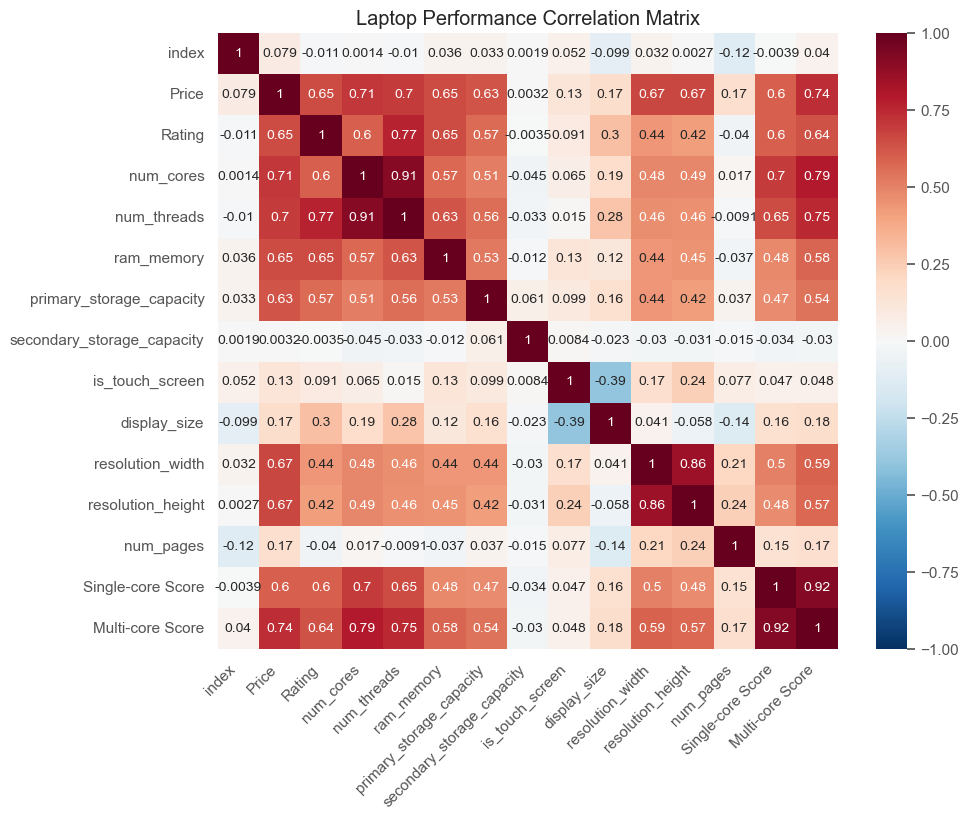

In [21]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Laptop Performance Correlation Matrix')

plt.show()

Some very interesting things to note from this correlation matrix. There are a few obvious ones, like resolution_width and resolution height are highly correlated. Also the number of threads and the number of cores are also highly correlated - but this is also generally true. An interesting negative correlation is that display size and if the the screen is a touch screen are negatively correlated. This is typically true because the larger the screen the more expensive it is to have the screen with touch capabilities. One I would like to point out is that secondary storage capacity seems to have no impact, so I will remove it. Also the number of pages quarried, has little to no impact. Originally I thought this may correlate to the popularity of the laptops but I do not think it will have much impact.

In [22]:
df = df.drop(columns=['secondary_storage_capacity', 'num_pages', 'index'])

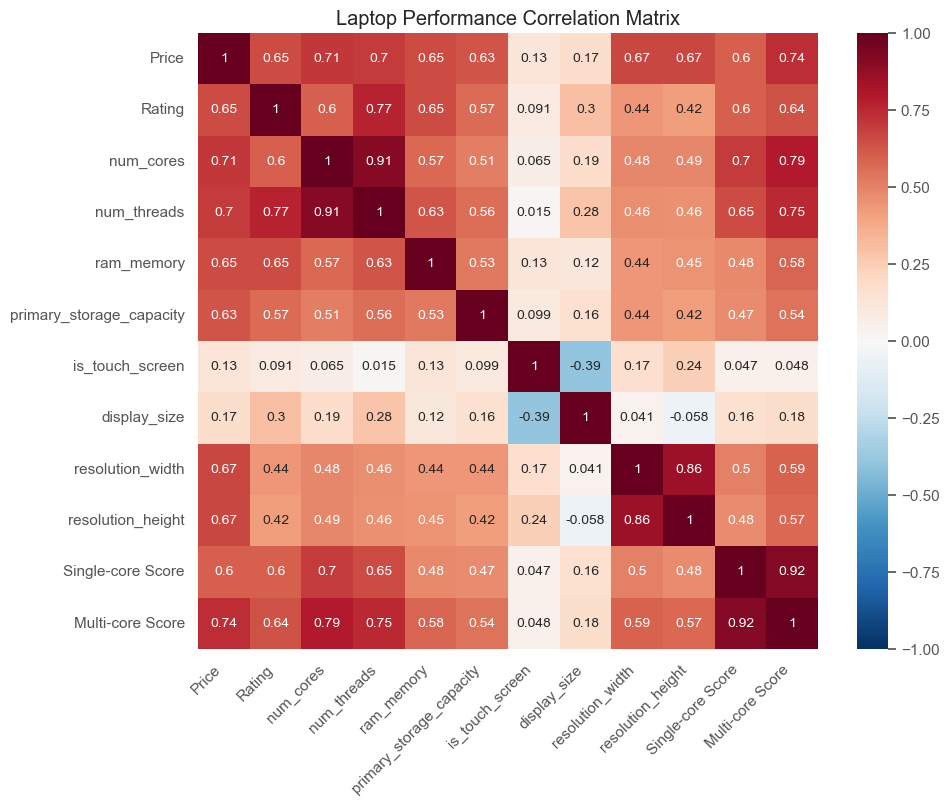

In [23]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Laptop Performance Correlation Matrix')

plt.show()

Other than that everything else seems to range well. It'll be interesting to continue analysis.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


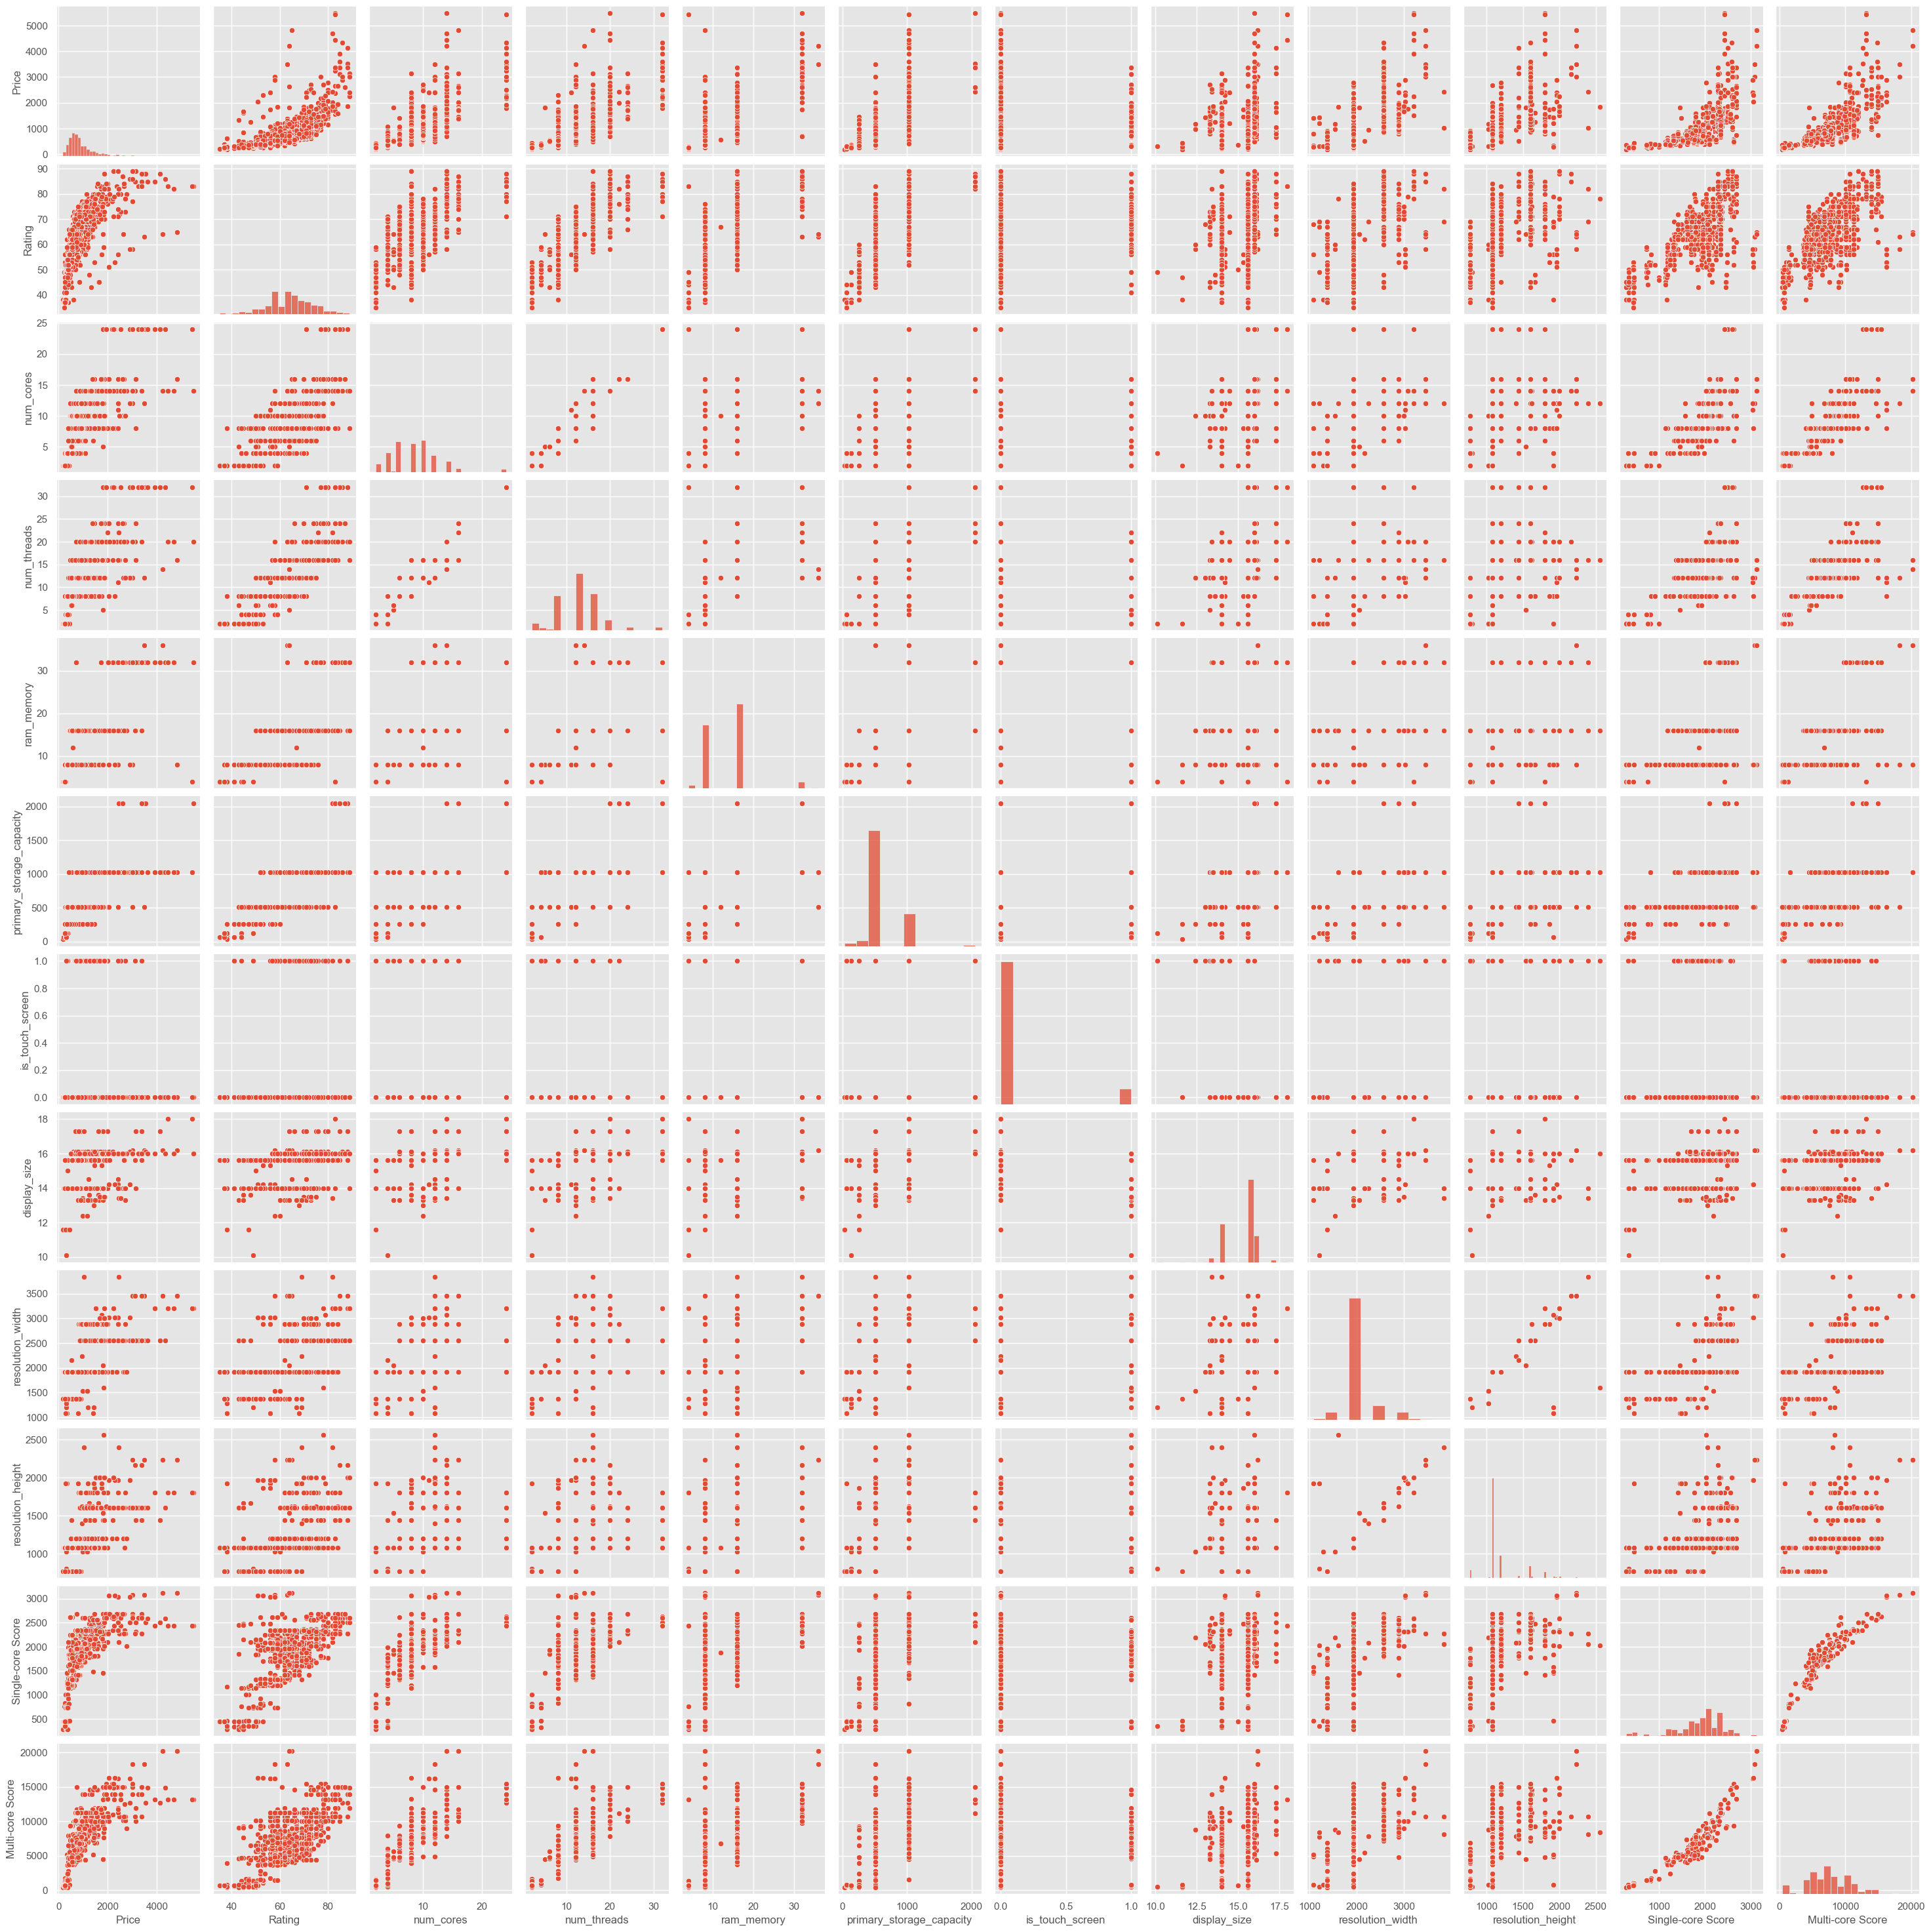

In [24]:
sns.pairplot(data = df);

This plot further confirms our previous observations.

### Interesting Finds
Now lets plot some interesting findings. The next chart shows the normalized means of each brand. This helps us see the overall characteristics of each brand.

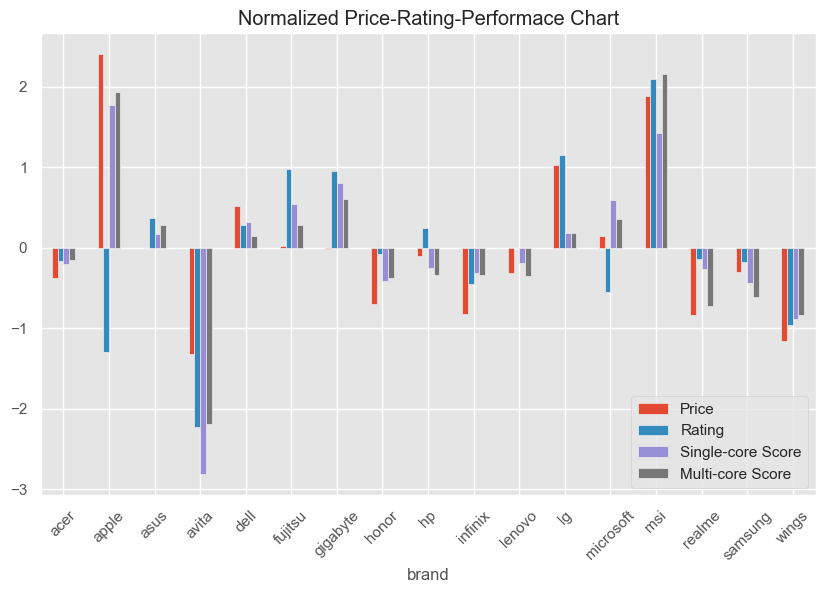

In [25]:
brand_df = df.groupby('brand')[['Price', 'Rating', 'Single-core Score', 'Multi-core Score']].mean()
brand_df=(brand_df-brand_df.mean())/brand_df.std()      #Apply mean normalization
brand_df.plot.bar()
plt.xticks(rotation=45);
plt.title('Normalized Price-Rating-Performace Chart');

A good way to break down this chart is to picture `0` as the mean of each category. If a bar drops below the mean, that means it is usually below average on that category, similarly if the mean is above the average, then the above average. Also, each bar is divided by the standard deviation of the category. So this mean the the distance the bar travels reflects how far off the data is from the standard deviation.

Taking a look at this chart one can pull a great deal of analysis about each brand in each category. For simplicity, `Single-core Score` and `Multi-core Score` will reflect performance, the `Rating` will reflect the popularity of the product, and the `Price` is simply the average price of the brand. The performance information was retrieved from [Geekbench.com](https://www.geekbench.com/), while the popularity and price were retrieved from the kaggle dataset. 

One thing to note are the unusuals. For instance take Apple, whose laptops are some of the most expensive in our data set, have one of the least ratings, while its performace is above most. And take Avita laptops. Similarly, Microsoft has similar characteristics at a smaller scale. Then take a look at Avita, they have some of the worst laptops. In general though, it seems as though if the laptop price is above the average, so is performance and in most cases the rating of the product.

Next graph compares how the specs of each brand's laptops compare to the performance scores.


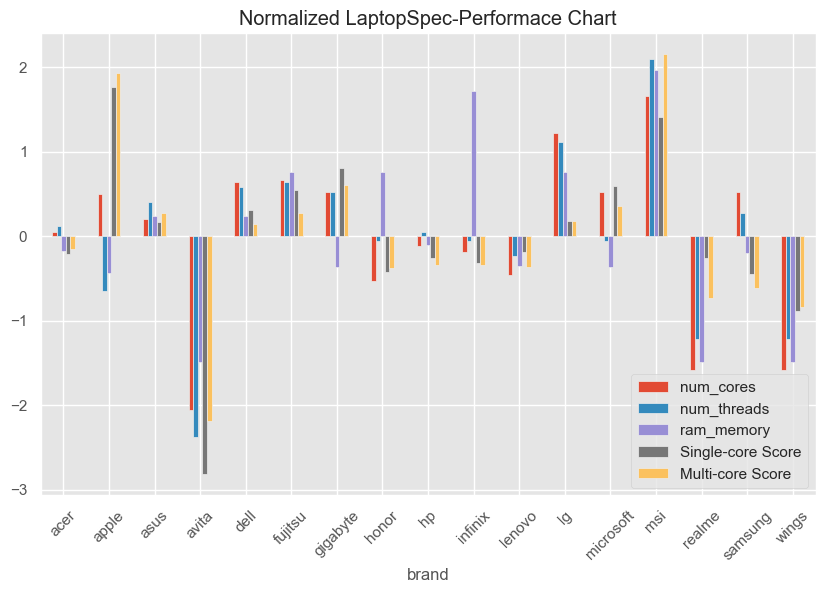

In [26]:
spec_df = df.groupby('brand')[['num_cores', 'num_threads', 'ram_memory', 'Single-core Score', 'Multi-core Score']].mean()
spec_df=(spec_df-spec_df.mean())/spec_df.std()      #Apply mean normalization
spec_df.plot.bar()
plt.xticks(rotation=45);
plt.title('Normalized LaptopSpec-Performace Chart');

## Analysis Methodology
How are you planning to analyze your data?

Analysis of the data will be done through various regression techniques to examine each individual catagory of data. Then the possibility of prediction models lay at hand, possibly using Random Forest for classification, or Deep learning to predict performance based on Price, CPU speed, ram, integrated/dedicated GPU, etc. 

I plan to perform regression on the data set, targeting the single-core score and multi-core score. Then I plan to test all machine learning algorithms we have learned this semester that have to do with regression. I also still need to normalize all the data before I perform regression or ML algorithms.


## Project Schedule
Make sure that you plan your work so that you can avoid a big rush right before the final project deadline. Write this in terms of weekly deadlines.

1. Done - Week of March 17th: Program procedure for scraping web for performance metrics
2. Done - Week of March 24th: Start to clean data and combine datasets, start visualizing the data
3. Done - Week of March 31st: Explore the data and make observations
4. Week of April 21th: Develope Machine Learning models and start to make conclusions about the dataset
5. Week of April 28th: Finalize Report